### **Credit Risk Predict with Machine Learning**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
     

### **Import Dataset**

In [2]:
# import data 
df = pd.read_csv('loan_data_2007_2014.csv')
# sample
df.sample(5)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
160128,160128,3537201,4429697,21200,21200,21200.0,36 months,6.03,645.24,A,...,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN
54374,54374,9217927,11039893,6900,6900,6900.0,36 months,12.99,232.46,B,...,NaN,NaN,NaN,NaN,NaN,NaN,7200.0,NaN,NaN,NaN
397003,397003,15579879,17672329,17950,17950,17850.0,60 months,17.57,451.63,D,...,NaN,NaN,NaN,NaN,NaN,NaN,28200.0,NaN,NaN,NaN
213219,213219,1348610,1593165,25000,25000,25000.0,36 months,21.48,948.05,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441969,441969,11717400,13689576,15000,15000,15000.0,36 months,11.99,498.15,B,...,NaN,NaN,NaN,NaN,NaN,NaN,24100.0,NaN,NaN,NaN


### **Data Exploration**

In [3]:
# shiw raw of data and feature numbers
print("Total rows :", df.shape[0])
print("Total features: ", df.shape[1])

Total rows : 466285
Total features:  75


In [4]:
# chek duplicated value
df.duplicated().sum()

0

In [5]:
#show data item
list_item= []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,  Null, Null(%), Unique, Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null(%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3, 4]"
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000, 3000]"
5,funded_amnt_inv,float64,0,0.000000,9854,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0]"
6,term,object,0,0.000000,2,"[ 36 months, 60 months]"
7,int_rate,float64,0,0.000000,506,"[10.65, 15.27, 15.96, 13.49, 12.69]"
8,installment,float64,0,0.000000,55622,"[162.87, 59.83, 84.33, 339.31, 67.79]"
9,grade,object,0,0.000000,7,"[B, C, A, E, F]"


#### There are some features which considered to be dropped

- *Unnamed: 0, id, and member_id* are representing unique values for each rows.
- policy code, and application type have only 1 value.
- unnecessary features like title, url, zip_code, addr_state, and desc.
- sub_grade seems like a form of expert judgement from grade
- 100% null values like annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, - -- open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi,total_cu_tl, and inq_last_12m.

#### Some features with > 20% of missing values will have a higher probability of being dropped since performing imputation seems to have a huge impact on originality of the dataset.

- mths_since_last_delinq, mths_since_last_record, next_pymnt_d,mths_since_last_major_derog

#### Some features with < 20% of missing values will be maintained for imputation if possible

- emp_title, emp_length, acc_now_delinq

#### Some features with date-like values will be converted to datetime

- last_pymnt_d, next_pymnt_d, last_credit_pull_d, earliest_cr_line

#### Some feature's datatype will be changed accordingly

- term to integer

- annual_inc to integer

#### loan_status is the target feature with categorical values, therefore feature engineering will be performed.

### **Data Preprocessing Part1**

In [6]:
#data clean
df_clean = df.copy()


#### Handling Missing Values

In [7]:
# Total null values
total_null = df_clean.isnull().sum()
percent_missing = df_clean.isnull().sum() * 100/ len(df)
dtypes = [df_clean[col].dtype for col in df_clean.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,inq_last_12m,466285,float64,100.000000
1,total_bal_il,466285,float64,100.000000
2,dti_joint,466285,float64,100.000000
3,verification_status_joint,466285,float64,100.000000
4,annual_inc_joint,466285,float64,100.000000
5,open_acc_6m,466285,float64,100.000000
6,open_il_6m,466285,float64,100.000000
7,open_il_12m,466285,float64,100.000000
8,open_il_24m,466285,float64,100.000000
9,mths_since_rcnt_il,466285,float64,100.000000


In [8]:
# Drop feature that have more than 50% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 50].index.tolist()
df_clean.drop(columns=col_full_null, inplace = True)

# Drop unrelevant feature
df_clean.drop(['policy_code','application_type','title', 'url','zip_code', 'addr_state','sub_grade','Unnamed: 0','id','member_id','emp_title','pymnt_plan','issue_d'], axis = 1, inplace=True)

### **Feature Engineering**

#### Target of Feature

In [9]:
# target of feature is loan status 
df_clean['loan_status'].value_counts()


Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- There are 9 unique values in the loan_status column that will be the target model.
- Divided into two groups such as binary classification, namely "suitable" with the number 1 and "not suitable" with the number 0
- suitable is defined as having a loan status of Current, Fully Paid , and In Grace Period
- bad loan is defined as having a loan status other than suitable

In [10]:
# listing values that are into suitable for loan approval list
suitable = ['Current', 'Fully Paid', 'In Grace Period']

# encoding loan_status
df_clean['loan_status'] = np.where(df_clean['loan_status'].isin(suitable), 1, 0)
df_clean['loan_status'].value_counts()/len(df_clean)*100

1    88.381784
0    11.618216
Name: loan_status, dtype: float64

#### Date-Time Features

In [11]:
# format data type
df_clean['earliest_cr_line'] = pd.to_datetime(df_clean['earliest_cr_line'], format = '%b-%y')
df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean['last_credit_pull_d'], format = '%b-%y')
df_clean['last_pymnt_d'] = pd.to_datetime(df_clean['last_pymnt_d'], format = '%b-%y')
df_clean['next_pymnt_d'] = pd.to_datetime(df_clean['next_pymnt_d'], format = '%b-%y')

In [12]:
# count the distance until the assumed date (March 1st, 2016)
df_clean['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_clean['earliest_cr_line']) / np.timedelta64(1, 'M')))
df_clean['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_clean['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df_clean['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_clean['last_pymnt_d']) / np.timedelta64(1, 'M')))
df_clean['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_clean['next_pymnt_d']) / np.timedelta64(1, 'M')))

#### Change Datatype

In [13]:
#term to integer
df_clean['term'] = df_clean['term'].apply(lambda term: int(term[:3])) # filter for first 2 character

### **Exploratory Data Analysis**

#### Statistical Analysis

In [14]:
 # Statistic Analysis for numerical features
df_clean.describe().T       

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
term,466285.0,42.605334,10.719040,36.00,36.000000,36.000000,60.00000,6.000000e+01
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
loan_status,466285.0,0.883818,0.320444,0.00,1.000000,1.000000,1.00000,1.000000e+00
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01


In [15]:
# Categorical Statistic value
df_clean.describe(include = 'O').T

,count,unique,top,freq
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


#### Multivariate Analysis

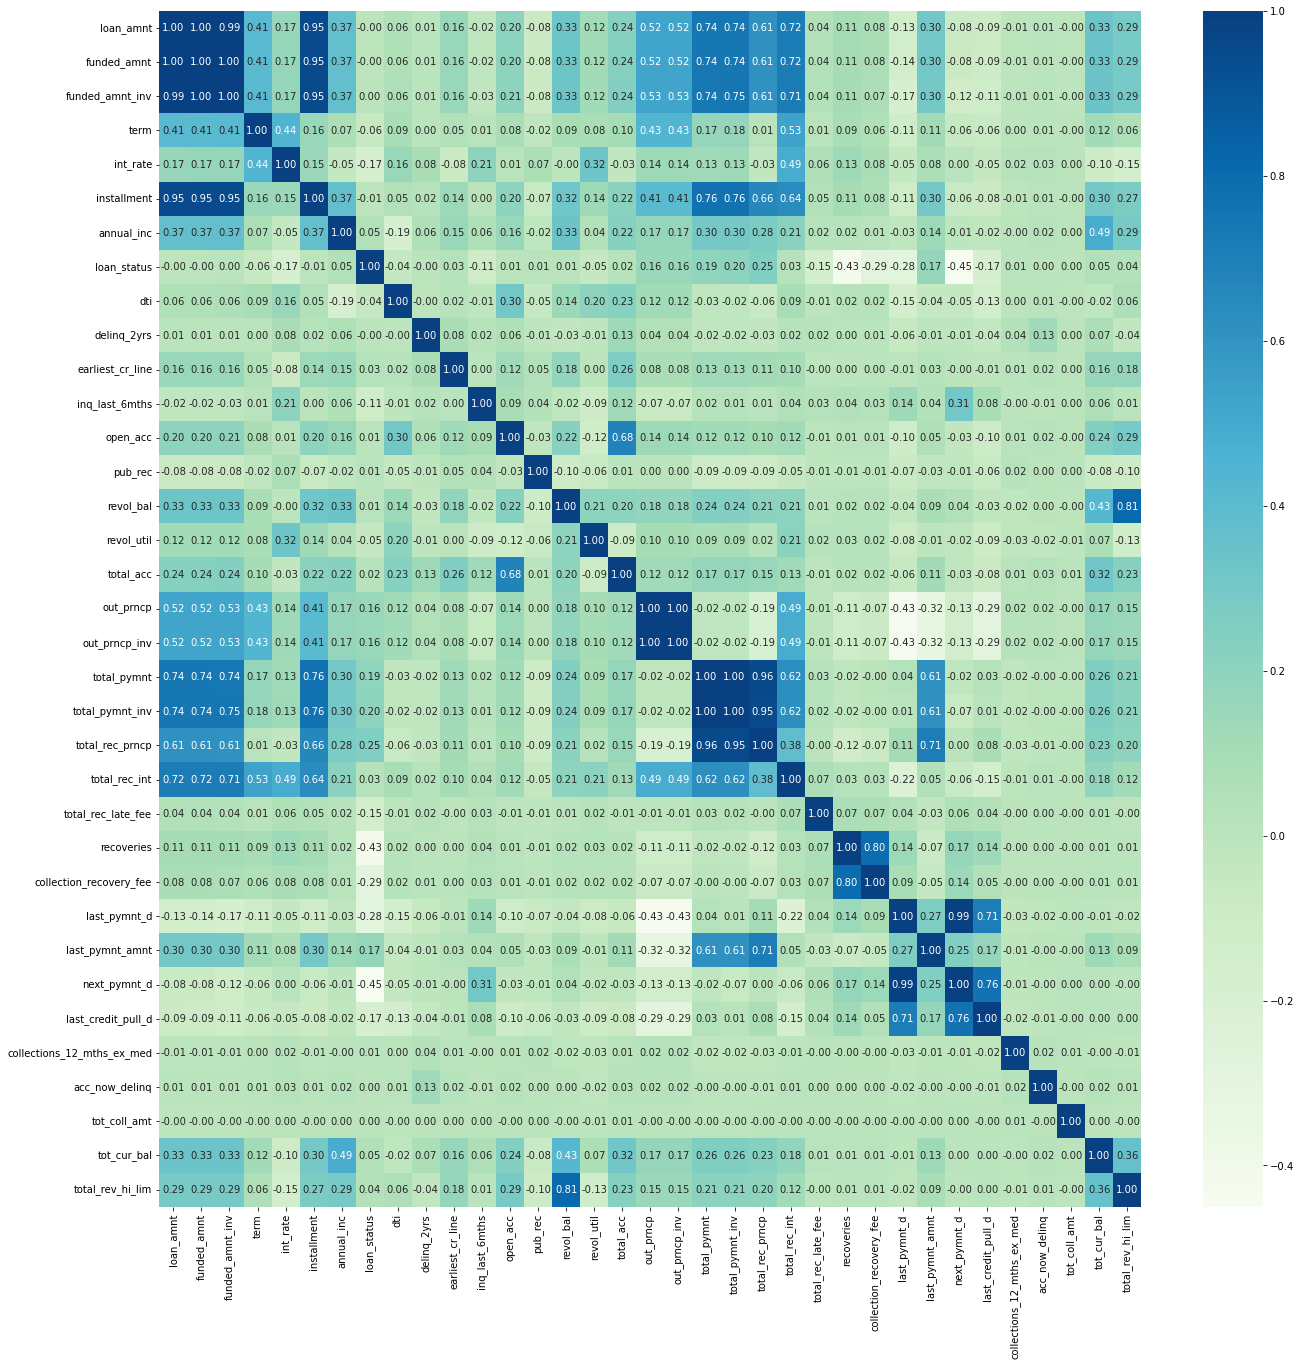

In [16]:
plt.figure(figsize=(22,22))
sns.heatmap(df_clean.corr(), cmap='GnBu', annot=True, fmt='.2f')
plt.show()

From the correlation heatmap, there are features with highly correlation values to the loan_status. To prevent multicolinearity, some of these features will be dropped using threshold value 0.7.

### **Data Preprocessing Part2**

#### Drop same features 

In [17]:


# create a square matrix with dimensions equal to the number of features
cor_matrix = df_clean.corr().abs()

# select the upper triangular. nb: choosing upper or lower will have the same result
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

# create drop list with 0.7 as threshold
hicorr_drop_list = [column for column in upper.columns if any(upper[column] > 0.7)]

# show drop_list
hicorr_drop_list

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'total_rev_hi_lim']

In [18]:
# drop
df_clean.drop(hicorr_drop_list, axis = 1, inplace=True)

In [19]:
df_clean.corr()['loan_status'].sort_values()

recoveries                   -0.426263
last_pymnt_d                 -0.277892
int_rate                     -0.172282
total_rec_late_fee           -0.154241
inq_last_6mths               -0.110395
term                         -0.058383
revol_util                   -0.047998
dti                          -0.043026
loan_amnt                    -0.004195
delinq_2yrs                  -0.002226
acc_now_delinq                0.000458
tot_coll_amt                  0.001178
collections_12_mths_ex_med    0.005137
open_acc                      0.008042
pub_rec                       0.009864
revol_bal                     0.011045
total_acc                     0.024588
earliest_cr_line              0.032652
annual_inc                    0.048960
tot_cur_bal                   0.050865
out_prncp                     0.157245
loan_status                   1.000000
Name: loan_status, dtype: float64

#### Handling Missing Values

In [20]:
# Feature `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` replace missing value with "0" because asumption that customer didn't borrowed again
for col in ['tot_coll_amt','tot_cur_bal']:
    df_clean[col] = df_clean[col].fillna(0)
    
# Numerical columns replace missing value with "Median"
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

# Categorical columns replace missing value with "Mode"
for col in df_clean.select_dtypes(include = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
df_clean.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
dtype: int64

In [21]:
## check 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  int32  
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  earliest_cr_line            466285 non-null  float64
 13  inq_last_6mths

#### Business Insight

In [22]:
df_eda = df.copy()

In [23]:
# create target feature
df_eda['risk'] = np.where((df_eda['loan_status'] =='Charged Off') | 
                         (df_eda['loan_status'] =='Default') | 
                         (df_eda['loan_status'] =='Late (31-120 days)') | 
                         (df_eda['loan_status'] =='Late (16-30 days)') | 
                         (df_eda['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

### **The Number of Applicants by Loan Status**

In [24]:
# table
loan_grp = df_eda.groupby('loan_status').size().reset_index()
loan_grp.columns = ['target','total']
loan_grp['%'] = round(loan_grp['total']*100/sum(loan_grp['total']),2)
loan_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

,target,total,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


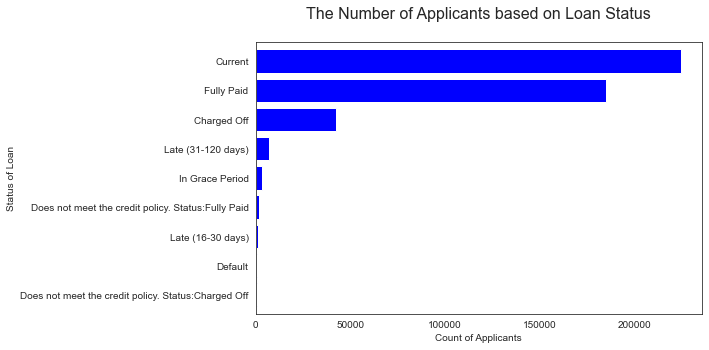

In [25]:
# visualization
sns.set_style('white')
fig = plt.figure(figsize = (8,5))
grp = df_eda['loan_status'].value_counts().sort_values(ascending=True)
grp.plot(kind='barh', color='blue', width=0.8)
plt.title('The Number of Applicants based on Loan Status\n', fontsize=16)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')
plt.show()

##### **There are about 48% which is equal to about 224,226 applicants with loan status of Current, followed by loan status of Fully Paid with 39.6% or equal to 184,739 applicants.**

In [26]:
grp_risk = df_eda.groupby('risk').size().reset_index()
grp_risk.columns = ['target','total']
grp_risk['%'] = round(grp_risk['total']*100/sum(grp_risk['total']),2)
grp_risk.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


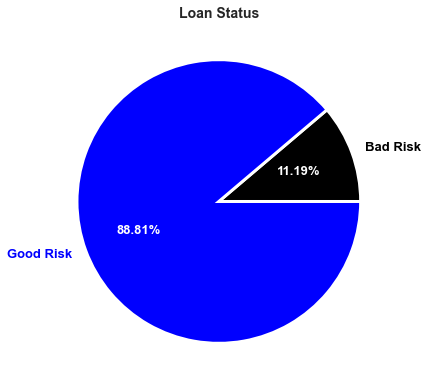

In [27]:
# visualization
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors =  ["black", "blue"]              #["#ba3d51", "#68abad"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(grp_risk['total'], labels=labels, autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=800)
plt.setp(texts, fontweight=800)
ax.set_title('Loan Status', fontsize=14, fontweight='bold')
plt.tight_layout()

##### **It is observed that this dataset is highly imbalanced with the 11% minority class, i.e Bad Risk and 88% majority class, i.e Good Risk.**

### **Risk Status by Term**

Text(0.5, 0, '\nTerm')

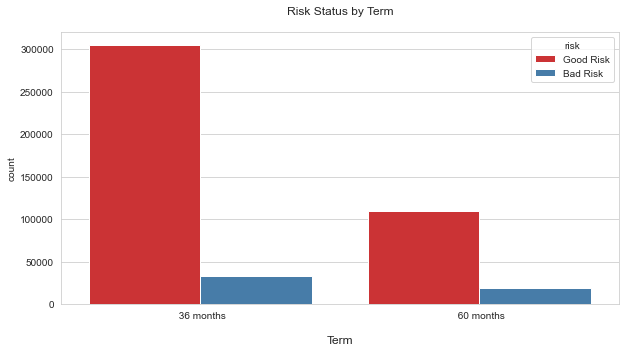

In [45]:
# visualization
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

fig = sns.countplot(data = df_eda, x='term', hue = 'risk', palette='Set1')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

- Loan term tell us about the number of payments on the loan.
- There are only two types of loan terms, either 36 months or 60 months. Most of the loans (73%) are shorter, with a term of 36 months.
- Loans with 36 months period are almost twice as likely to bad risk as loans with 60 months period.

### **Risk Status by Home Ownership**

In [48]:
## check 
df_eda['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [49]:
# reduce the number of categories of home ownership
def func(row):
    if row['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif (row['home_ownership'] == 'RENT'):
        val ='RENT'
    elif (row['home_ownership'] == 'OWN'):
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df_eda['home_ownership'] = df_eda.apply(func, axis=1)

Text(0.5, 0, '\nHome Ownership')

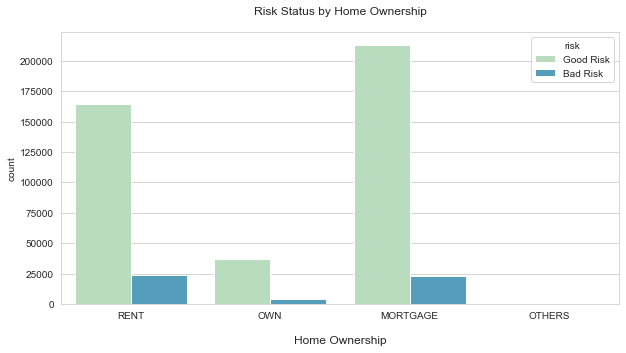

In [50]:
# visualization
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

fig = sns.countplot(data = df_eda, x='home_ownership', hue = 'risk', palette='GnBu')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

- The home ownership feature is category provided by the applicant's during registration.
- Most applicants have an existing mortgage (50%) or are currently renting a home (40%).
- Applicants who have an existing mortgage or are currently renting a home have a higher probability of bad risk.

### **Loan Status by purpose**

In [51]:
# reduce the number of categories of purpose
df_eda['purpose'] = np.select([(df_eda['purpose'] == 'debt_consolidation'),
                               (df_eda['purpose'] == 'credit_card'),
                               (df_eda['purpose'] == 'other'),
                               (df_eda['purpose'] == 'major_purchase'),
                               (df_eda['purpose'].str.contains('home|car|house')),
                               (df_eda['purpose'].str.contains('small|medic|moving|vaca|wedd|educa|renew'))],
                               ['debt_consolidation','credit_card','other','major_purchase','Object_spending','Life_spending'])

In [52]:
# Bad Risk by Purpose
df_pr = df_eda[(df_eda['risk'] == 'Bad Risk')]
df_pr = df_pr.groupby(['purpose'])['member_id'].agg(['count']).reset_index()
df_pr.columns = ['Reason', 'Bad Risk']
df_pr['percentage'] = round((df_pr['Bad Risk']/len(df_clean))*100,3)
df_pr = df_pr.sort_values('Bad Risk', ascending=False).reset_index(drop=True)
df_pr

,Reason,Bad Risk,percentage
0,debt_consolidation,31836,6.828
1,credit_card,9200,1.973
2,Object_spending,3482,0.747
3,Life_spending,3367,0.722
4,other,3339,0.716
5,major_purchase,962,0.206


Text(0.5, 0, '\nPurpose')

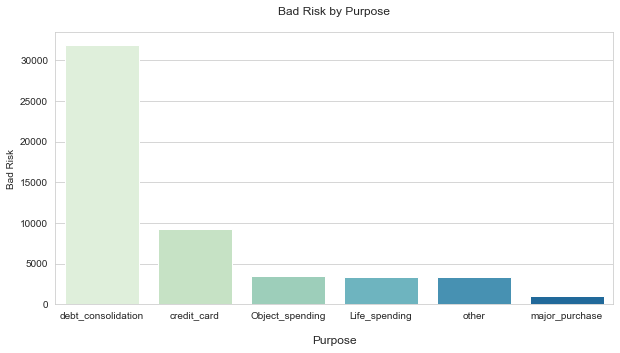

In [53]:
# visualization
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')

fig = sns.barplot(data = df_pr, x='Reason', y='Bad Risk', palette='GnBu')
plt.title('Bad Risk by Purpose\n', fontsize=12)
plt.xlabel('\nPurpose', fontsize=12)

- Most of Customer that type Bad Risk is in debt_consolidation 6.8%
- For the second is credit_card 
- This shows that for debt reasons, the customer is more likely to be the type of customer that is Bad 

## **Feature Selection** 

In [54]:
df_clean.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal']

In [55]:
df_fs = df_clean.copy()

In [56]:
# code automation

def woe(raw, feature_name):
    # probability analysis
    feature_name = raw.groupby(feature_name).agg(num_observation=('loan_status','count'),
                                                good_loan_prob=('loan_status','mean')).reset_index()
    
    # find the feature proportion
    feature_name['feat_proportion'] = feature_name['num_observation']/(feature_name['num_observation'].sum())
    
    # find number of approved loan behavior
    feature_name['num_loan_approve'] = feature_name['feat_proportion'] * feature_name['num_observation']

    # find number of declined loan behavior
    feature_name['num_loan_decline'] = (1-feature_name['feat_proportion']) * feature_name['num_observation']

    # find approved loan proportion
    feature_name['prop_loan_approve'] = feature_name['num_loan_approve'] / (feature_name['num_loan_approve'].sum())

    # find declined loan proportion
    feature_name['prop_loan_decline'] = feature_name['num_loan_decline'] / (feature_name['num_loan_decline'].sum())

    # calculate weight of evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['prop_loan_approve'] / feature_name['prop_loan_decline'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    
    # calculate information value
    feature_name['information_value'] = (feature_name['prop_loan_approve']-feature_name['prop_loan_decline']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['feat_proportion','num_loan_approve','num_loan_decline','prop_loan_approve','prop_loan_decline'],axis = 1)

    return feature_name

### **Catagorical Features**

In [57]:
# Categorical Statistic Value
df_clean.describe(include = 'O').T

,count,unique,top,freq
grade,466285,7,B,136929
emp_length,466285,11,10+ years,171057
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


#### Grade

In [58]:
##grade
woe(df_fs,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.679711,-3.660567,0.292639
1,F,13229,0.741401,-2.257091,0.292639
2,E,35757,0.789775,-1.211753,0.292639
3,A,74867,0.959328,-0.377550,0.292639
4,D,76888,0.835787,-0.345737,0.292639
5,C,125293,0.878493,0.275309,0.292639
6,B,136929,0.917643,0.398836,0.292639


### emp_length

In [59]:
woe(df_fs,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.881093,-1.682895,1.030304
1,8 years,22395,0.884349,-1.448086,1.030304
2,6 years,26112,0.876800,-1.286119,1.030304
3,7 years,26180,0.883613,-1.283364,1.030304
4,4 years,28023,0.882240,-1.211138,1.030304
5,1 year,29622,0.877017,-1.151991,1.030304
6,5 years,30774,0.878696,-1.111196,1.030304
7,< 1 year,36265,0.867944,-0.934325,1.030304
8,3 years,36596,0.882446,-0.924469,1.030304
9,2 years,41373,0.881251,-0.790600,1.030304


#### home_ownership

In [60]:
df_fs['home_ownership'] = np.where(df_fs['home_ownership']=='ANY','OTHER',
                       np.where(df_fs['home_ownership']=='NONE','OTHER',df_fs['home_ownership']))

In [61]:
woe(df_fs,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,OTHER,233,0.669528,-7.308027,0.311741
1,OWN,41704,0.885359,-2.027519,0.311741
2,RENT,188473,0.866501,-0.095003,0.311741
3,MORTGAGE,235875,0.897594,0.316429,0.311741


#### verification_status

In [62]:
woe(df_fs,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.895262,-0.075220,0.007663
1,Source Verified,149993,0.891342,-0.057908,0.007663
2,Verified,168055,0.867008,0.114596,0.007663


#### purpose

In [63]:
woe(df_fs,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.840456,-6.796087,1.409257
1,educational,422,0.637441,-6.611715,1.409257
2,house,2269,0.843543,-4.925653,1.409257
3,wedding,2343,0.860009,-4.893401,1.409257
4,vacation,2487,0.872135,-4.833445,1.409257
5,moving,2994,0.834335,-4.646819,1.409257
6,medical,4602,0.856584,-4.213461,1.409257
7,car,5397,0.900130,-4.052385,1.409257
8,small_business,7013,0.766862,-3.786951,1.409257
9,major_purchase,9828,0.891941,-3.443333,1.409257


#### initial_list_status

In [64]:
woe(df_fs,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,163280,0.907741,-0.798355,0.340013
1,f,303005,0.870926,0.438211,0.340013


### **Numerical Features**

In [65]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
term,466285.0,42.605334,10.719040,36.00,36.00,36.00,60.00,60.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.00,63000.00,88953.00,7500000.00
loan_status,466285.0,0.883818,0.320444,0.00,1.00,1.00,1.00,1.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.00,0.00,0.00,29.00
earliest_cr_line,466285.0,218.481530,93.971976,-633.00,162.00,204.00,264.00,566.00
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.00,0.00,1.00,33.00
open_acc,466285.0,11.186995,4.987380,0.00,8.00,10.00,14.00,84.00


#### loan_amnt

In [66]:
# refining class = 10 class
df_fs['loan_amnt_fs'] = pd.cut(df_fs['loan_amnt'], 10)
woe(df_fs,'loan_amnt_fs')

,loan_amnt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 31550.0]",13389,0.871088,-1.618217,0.249994
1,"(31550.0, 35000.0]",21517,0.878840,-1.125698,0.249994
2,"(21200.0, 24650.0]",25467,0.882789,-0.948237,0.249994
3,"(24650.0, 28100.0]",26705,0.882232,-0.897957,0.249994
4,"(465.5, 3950.0]",27901,0.877280,-0.851421,0.249994
5,"(17750.0, 21200.0]",58167,0.884264,-0.045227,0.249994
6,"(14300.0, 17750.0]",60751,0.882685,0.004590,0.249994
7,"(10850.0, 14300.0]",65080,0.889505,0.084156,0.249994
8,"(3950.0, 7400.0]",75702,0.886608,0.262176,0.249994
9,"(7400.0, 10850.0]",91606,0.883708,0.494439,0.249994


#### term

In [67]:
woe(df_fs,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60,128332,0.853458,-1.378129,0.72423
1,36,337953,0.895346,0.558444,0.72423


#### int_rate

In [68]:
# refining class = 10 class
df_fs['int_rate_fs'] = pd.cut(df_fs['int_rate'], 10)
woe(df_fs,'int_rate_fs')

,int_rate_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(23.996, 26.06]",8846,0.758761,-2.104911,0.273615
1,"(21.932, 23.996]",14343,0.763787,-1.609524,0.273615
2,"(19.868, 21.932]",19782,0.797341,-1.275906,0.273615
3,"(5.399, 7.484]",27568,0.973919,-0.926431,0.273615
4,"(17.804, 19.868]",38003,0.815436,-0.581349,0.273615
5,"(7.484, 9.548]",56410,0.952987,-0.142438,0.273615
6,"(9.548, 11.612]",58827,0.922298,-0.094569,0.273615
7,"(15.74, 17.804]",60358,0.839259,-0.065112,0.273615
8,"(13.676, 15.74]",87615,0.875478,0.377055,0.273615
9,"(11.612, 13.676]",94533,0.904002,0.471490,0.273615


#### annual_inc

In [69]:
# refining class = 4 class
df_fs['annual_inc_fs'] = pd.cut(df_fs['annual_inc'], 4)
woe(df_fs,'annual_inc_fs')

,annual_inc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(3750948.0, 5625474.0]",4,1.000000,-21.253020,10.815926
1,"(5625474.0, 7500000.0]",5,1.000000,-21.029875,10.815926
2,"(1876422.0, 3750948.0]",7,1.000000,-20.693398,10.815926
3,"(-5602.104, 1876422.0]",466269,0.883814,0.693158,10.815926


#### dti

In [70]:
# refining class = 10 class
df_fs['dti_fs'] = pd.cut(df_fs['dti'], 10)
woe(df_fs,'dti_fs')

,dti_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(35.991, 39.99]",2753,0.875772,-3.292330,0.215744
1,"(31.992, 35.991]",13654,0.862604,-1.667191,0.215744
2,"(-0.04, 3.999]",16728,0.891619,-1.457325,0.215744
3,"(27.993, 31.992]",30288,0.861826,-0.833030,0.215744
4,"(3.999, 7.998]",42962,0.905544,-0.453966,0.215744
5,"(23.994, 27.993]",50073,0.865037,-0.283859,0.215744
6,"(7.998, 11.997]",69311,0.900853,0.088587,0.215744
7,"(19.995, 23.994]",71058,0.869726,0.117890,0.215744
8,"(15.996, 19.995]",84089,0.881435,0.319796,0.215744
9,"(11.997, 15.996]",85369,0.894072,0.338258,0.215744


#### delinq_2yr

In [71]:
# this feature will be encoded, if values = 0 return 0, if its greater than 0 return 1, if > 5, return 2
df_fs['delinq_2yrs_fs'] = np.where(df_fs['delinq_2yrs'] > 3, 3,
                                 np.where(df_fs['delinq_2yrs'] == 2, 2,
                                 np.where(df_fs['delinq_2yrs'] == 1,1,0)))

# show
woe(df_fs,'delinq_2yrs_fs')

,delinq_2yrs_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,5084,0.881786,-5.406375,2.038543
1,2,16310,0.880135,-4.216053,2.038543
2,1,56224,0.885654,-2.885602,2.038543
3,0,388667,0.883733,0.712284,2.038543


#### earliest_cr_line

In [72]:
# refining class = 10 class
df_fs['earliest_cr_line_fs'] = pd.cut(df_fs['earliest_cr_line'], 10)
woe(df_fs,'earliest_cr_line_fs')

,earliest_cr_line_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(-393.2, -273.3]",4,1.000000,-11.225009,0.52719
1,"(-513.1, -393.2]",48,0.854167,-8.740008,0.52719
2,"(-634.199, -513.1]",1117,0.864816,-5.590512,0.52719
3,"(-33.5, 86.4]",7464,0.871651,-3.677329,0.52719
4,"(446.1, 566.0]",9154,0.903976,-3.469539,0.52719
5,"(326.2, 446.1]",45234,0.903723,-1.789665,0.52719
6,"(206.3, 326.2]",173251,0.890182,-0.084307,0.52719
7,"(86.4, 206.3]",230013,0.874798,0.414392,0.52719
8,"(-273.3, -153.4]",0,NaN,NaN,0.52719
9,"(-153.4, -33.5]",0,NaN,NaN,0.52719


#### inq_last_6mths

In [73]:
#encoding the feature
df_fs['inq_last_6mths_fs'] = np.where(df_fs['inq_last_6mths'] == 0,0,
                                    np.where((df_fs['inq_last_6mths'] > 0)&(df_fs['inq_last_6mths'] <=3),1,
                                    np.where((df_fs['inq_last_6mths']>3)&(df_fs['inq_last_6mths']<=6),2,
                                    np.where((df_fs['inq_last_6mths']>6)&(df_fs['inq_last_6mths']<=9),3,4))))

# show
woe(df_fs,'inq_last_6mths_fs')

,inq_last_6mths_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4,95,0.000000,-8.409390,0.188408
1,3,367,0.147139,-7.057322,0.188408
2,2,11197,0.737162,-3.615764,0.188408
3,1,213099,0.869033,-0.083286,0.188408
4,0,241527,0.905129,0.161038,0.188408


#### open_acc

In [74]:
# refining class = 5 class
df_fs['open_acc_fs'] = pd.cut(df_fs['open_acc'], 5)
woe(df_fs,'open_acc_fs')

,open_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 84.0]",4,0.500000,-12.858748,1.830395
1,"(50.4, 67.2]",22,1.000000,-11.153962,1.830395
2,"(33.6, 50.4]",898,0.886414,-7.442954,1.830395
3,"(16.8, 33.6]",61622,0.886907,-3.074535,1.830395
4,"(-0.084, 16.8]",403739,0.883338,0.672367,1.830395


#### pub_rec

In [75]:
# refining class = 5 class
df_fs['pub_rec_fs'] = pd.cut(df_fs['pub_rec'], 5)
woe(df_fs,'pub_rec_fs')

,pub_rec_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(25.2, 37.8]",1,1.000000,-22.703865,10.838649
1,"(37.8, 50.4]",2,1.000000,-22.010715,10.838649
2,"(50.4, 63.0]",2,1.000000,-22.010715,10.838649
3,"(12.6, 25.2]",10,1.000000,-20.401260,10.838649
4,"(-0.063, 12.6]",466270,0.883814,0.693155,10.838649


#### revol_bal

In [76]:
#encode to new class
df_fs['revol_bal_fs'] = np.where((df_fs['revol_bal']>=0)&(df_fs['revol_bal']<=5000),0,
                               np.where((df_fs['revol_bal']>5000)&(df_fs['revol_bal']<=10000),1,
                               np.where((df_fs['revol_bal']>10000)&(df_fs['revol_bal']<=15000),2,3)))

# show
woe(df_fs,'revol_bal_fs')

,revol_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.875239,-0.576520,0.197731
1,2,88805,0.882011,-0.487635,0.197731
2,1,115537,0.880480,-0.151038,0.197731
3,3,179353,0.890813,0.489550,0.197731


#### revol_util

In [77]:
#encoding into new class
df_fs['revol_util_fs'] = np.where((df_fs['revol_util']>=0)&(df_fs['revol_util']<=20),0,
                                np.where((df_fs['revol_util']>20)&(df_fs['revol_util']<=40),1,
                                np.where((df_fs['revol_util']>40)&(df_fs['revol_util']<=60),2,
                                np.where((df_fs['revol_util']>60)&(df_fs['revol_util']<=80),3,4))))

# show
woe(df_fs,'revol_util_fs')

,revol_util_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37402,0.907438,-1.220141,0.157668
1,1,83492,0.901679,-0.303424,0.157668
2,4,84062,0.859449,-0.295130,0.157668
3,2,129737,0.889114,0.266088,0.157668
4,3,131592,0.876117,0.285812,0.157668


#### total_acc

In [78]:
# refining class = 5 class
df_fs['total_acc_fs'] = pd.cut(df_fs['total_acc'], 5)
woe(df_fs,'total_acc_fs')

,total_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(125.0, 156.0]",2,1.000000,-12.936344,1.03453
1,"(94.0, 125.0]",28,0.964286,-10.297231,1.03453
2,"(63.0, 94.0]",1221,0.904177,-6.519448,1.03453
3,"(32.0, 63.0]",107819,0.891911,-1.778323,1.03453
4,"(0.845, 32.0]",357215,0.881298,0.609405,1.03453


#### out_prncp

In [79]:
#Encoding into new class
df_fs['out_prncp_fs'] = np.where((df_fs['out_prncp']>=0)&(df_fs['out_prncp']<=1000),0,
                               np.where((df_fs['out_prncp']>1000)&(df_fs['out_prncp']<=10000),1,
                               np.where((df_fs['out_prncp']>10000)&(df_fs['out_prncp']<=17000),2,3)))

# show
woe(df_fs,'out_prncp_fs')

,out_prncp_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,28933,0.948225,-2.216759,0.587279
1,2,53928,0.956887,-1.535243,0.587279
2,1,142293,0.965585,-0.323834,0.587279
3,0,241131,0.811497,0.567552,0.587279


#### total_rec_late_fee

In [80]:
#Encoding into new class
df_fs['total_rec_late_fee_fs'] = np.where(df_fs['total_rec_late_fee']==0,0,1)

# show
woe(df_fs,'total_rec_late_fee_fs')

,total_rec_late_fee_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,1,10678,0.507024,-6.814292,3.749324
1,0,455607,0.892649,0.692598,3.749324


#### recoveries

In [81]:
# refining class = 5 class
df_fs['recoveries_fs'] = pd.cut(df_fs['recoveries'], 5)
woe(df_fs,'recoveries_fs')

,recoveries_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(26816.216, 33520.27]",5,0.000000,-17.866686,7.407134
1,"(20112.162, 26816.216]",13,0.000000,-16.911158,7.407134
2,"(13408.108, 20112.162]",45,0.000000,-15.669376,7.407134
3,"(6704.054, 13408.108]",315,0.000000,-13.722887,7.407134
4,"(-33.52, 6704.054]",465907,0.884535,0.693264,7.407134


#### last_pymnt_d

In [82]:
#Encoding into new class
df_fs['last_pymnt_d_fs'] = np.where(df_fs['last_pymnt_d']==2,0,
                                  np.where((df_fs['last_pymnt_d']>2)&(df_fs['last_pymnt_d']<=4),1,
                                  np.where((df_fs['last_pymnt_d']>4)&(df_fs['last_pymnt_d']<=6),2,
                                  np.where((df_fs['last_pymnt_d']>6)&(df_fs['last_pymnt_d']<=12),3,4))))
                                           
# show
woe(df_fs,'last_pymnt_d_fs')

,last_pymnt_d_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2,21452,0.793259,-2.045979,0.372559
1,3,61476,0.790487,-0.898867,0.372559
2,1,71693,0.940454,-0.719558,0.372559
3,4,132044,0.759845,0.057175,0.372559
4,0,179620,0.995106,0.518431,0.372559


#### collections_12_mths_ex_med

In [83]:
# refining class = 5 class
df_fs['collections_12_mths_ex_med_fs'] = pd.cut(df_fs['collections_12_mths_ex_med'], 5)
woe(df_fs,'collections_12_mths_ex_med_fs')

,collections_12_mths_ex_med_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(12.0, 16.0]",1,1.000000,-24.02565,12.186145
1,"(16.0, 20.0]",1,1.000000,-24.02565,12.186145
2,"(4.0, 8.0]",2,1.000000,-23.33250,12.186145
3,"(-0.02, 4.0]",466281,0.883817,0.69315,12.186145
4,"(8.0, 12.0]",0,NaN,NaN,12.186145


#### acc_now_delinq

In [84]:
# refining class = 5 class
df_fs['acc_now_delinq_fs'] = pd.cut(df_fs['acc_now_delinq'], 5)
woe(df_fs,'acc_now_delinq_fs')

,acc_now_delinq_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(4.0, 5.0]",2,0.500000,-20.027192,8.645917
1,"(3.0, 4.0]",4,1.000000,-19.334041,8.645917
2,"(2.0, 3.0]",11,0.818182,-18.322425,8.645917
3,"(1.0, 2.0]",92,0.902174,-16.198358,8.645917
4,"(-0.005, 1.0]",466176,0.883816,0.693179,8.645917


#### tot_coll_amt

In [85]:
# refining class = 5 class
df_fs['tot_coll_amt_fs'] = pd.cut(df_fs['tot_coll_amt'], 5)
woe(df_fs,'tot_coll_amt_fs')

,tot_coll_amt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(7322036.0, 9152545.0]",1,1.000000,-25.411953,13.05255
1,"(-9152.545, 1830509.0]",466284,0.883818,0.693147,13.05255
2,"(1830509.0, 3661018.0]",0,NaN,NaN,13.05255
3,"(3661018.0, 5491527.0]",0,NaN,NaN,13.05255
4,"(5491527.0, 7322036.0]",0,NaN,NaN,13.05255


#### tot_cur_bal

In [86]:
# refining class = 5 class
df_fs['tot_cur_bal_fs'] = pd.cut(df_fs['tot_cur_bal'], 5)
woe(df_fs,'tot_cur_bal_fs')

,tot_cur_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(6400062.4, 8000078.0]",1,1.000000,-20.624183,8.44193
1,"(3200031.2, 4800046.8]",11,0.909091,-18.226266,8.44193
2,"(1600015.6, 3200031.2]",108,0.935185,-15.941822,8.44193
3,"(-8000.078, 1600015.6]",466165,0.883805,0.693170,8.44193
4,"(4800046.8, 6400062.4]",0,NaN,NaN,8.44193


### **Summary**

Feature we will drop because have:

- Information value <0.02 (useless predictive)
- Information value > 0.5 (suspicious predictive)
- Feature that not make sense to bin

In [87]:
drop_list = ['emp_length','verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs','earliest_cr_line', 'total_acc','open_acc', 'pub_rec', 
             'out_prncp', 'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med', 
             'acc_now_delinq','tot_coll_amt','tot_cur_bal']

print('number of features that we will drop :',len(drop_list))

number of features that we will drop : 17


### **Feature Encoding**

In [88]:
df_test = df_clean.copy()

In [89]:
# drop unused features
df_test.drop(['emp_length','verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs','earliest_cr_line', 'total_acc','open_acc', 'pub_rec', 
             'out_prncp', 'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med', 
             'acc_now_delinq','tot_coll_amt','tot_cur_bal'], axis = 1, inplace=True)

In [90]:
cat = df_test.select_dtypes(include='O').columns
num = df_test.select_dtypes(exclude='O').columns

### **Cat Feature Encoding**

In [91]:
# handle with one hot encoding
for cat in ['grade', 'home_ownership', 'initial_list_status']:
  onehots = pd.get_dummies(df_clean[cat], prefix=cat)
  df_test = df_test.join(onehots)


In [92]:
df_test = df_test.drop(columns=['grade', 'home_ownership', 'initial_list_status'], axis =1)
df_test.head()

,loan_amnt,int_rate,loan_status,dti,inq_last_6mths,revol_bal,revol_util,last_pymnt_d,grade_A,grade_B,...,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w
0,5000,10.65,1,27.65,1.0,13648,83.7,14.0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2500,15.27,0,1.00,5.0,1687,9.4,35.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2400,15.96,1,8.72,2.0,2956,98.5,21.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,10000,13.49,1,20.00,1.0,5598,21.0,14.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,3000,12.69,1,17.94,0.0,27783,53.9,2.0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [93]:
#check
df_test.shape

(466285, 23)

### **Num Feature Encoding**

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
#Label encoding

le = LabelEncoder()

columns = [ 'loan_amnt', 'int_rate', 'loan_status', 'dti', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'last_pymnt_d'
]

for col in columns:
    df_test[col] = le.fit_transform(df_clean[col])

In [96]:
df_test.var()

loan_amnt                  1.084771e+05
int_rate                   1.780022e+04
loan_status                1.026841e-01
dti                        6.163881e+05
inq_last_6mths             1.187678e+00
revol_bal                  1.387978e+08
revol_util                 6.504629e+04
last_pymnt_d               1.640040e+02
grade_A                    1.347812e-01
grade_B                    2.074240e-01
grade_C                    1.965029e-01
grade_D                    1.377048e-01
grade_E                    7.080444e-02
grade_F                    2.756620e-02
grade_G                    7.073656e-03
home_ownership_ANY         2.144611e-06
home_ownership_MORTGAGE    2.499662e-01
home_ownership_NONE        1.072193e-04
home_ownership_OTHER       3.901677e-04
home_ownership_OWN         8.143973e-02
home_ownership_RENT        2.408231e-01
initial_list_status_f      2.275521e-01
initial_list_status_w      2.275521e-01
dtype: float64

In [97]:
#Check
# Show Data Rows & Features Number
print("Total Rows :", df_test.shape[0])
print("Total Features :", df_test.shape[1])

Total Rows : 466285
Total Features : 23


## **Modelling**

In [98]:
X = df_test.drop(labels=['loan_status'],axis=1)
y = df_test[['loan_status']]

### **Split Dataset**

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 42)

In [100]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### **Summary of Modeling ML**

In [1]:
def modelling(x_train,x_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    xgb = XGBClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    LGBM = lgb.LGBMClassifier()

    
    list_model = [('K-Nearest Neighbor',knn),
                  ('XgBoost', xgb),
                 ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('LightGBM',LGBM)
                  ]

    for model_name, model in list_model:
        model.fit(x_train,y_train)
        y_pred_proba = model.predict_proba(x_test)

        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        AUC = roc_auc_score(y_test, y_pred_proba[:, 1])
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['AUC'].append(AUC)
        
   return result

In [2]:
evaluation_summary = modelling(X_train,X_test,y_train,y_test)
evaluation_summary = pd.DataFrame(evaluation_summary)
evaluation_summary

### **Confusion Matric**

In [ ]:
lg_model = lgb.LGBMClassifier()
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)

In [ ]:
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Bad Loan', 'Good Loan'],
                 columns=['Predicted Bad Loan', 'Predicted Good Loan'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(9,5))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

In [ ]:
show_cmatrix(y_test, y_pred_lg)

### **Feature Importence**

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(lg_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8),color='turquoise')
ax.set(facecolor = "white")
ax.invert_yaxis()

### **Simulation with No-Model and Model**

In [ ]:
data_benefit = df_clean.copy()

In [ ]:
#define values
ambiguous = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop rows that contain ambiguous ending
data_benefit = data_benefit[data_benefit.loan_status.isin(ambiguous) == False]

#create new column to classify ending when 1 equal bad loan, and 0 equal good loan
data_benefit['loan_ending'] = np.where(data_benefit['loan_status'].isin(good_loan), 0, 1)

In [ ]:
#Growth Calculation 
Total = data_benefit['loan_ending'].count()
Bad =  data_benefit[data_benefit['loan_ending']==1]['loan_ending'].count()
Good =  data_benefit[data_benefit['loan_ending']==0]['loan_ending'].count()
PredRate = 0.889
PredBad = round(Bad*PredRate)
PredGood = Bad-PredBad

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Total_loan : \t\t', Total)
print('Bad_loan : \t\t', Bad, ',', round(Bad/Total*100,1),'%')
print('Good_loan : \t\t', Good, ',', round(Good/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Total_loan : \t\t', Total)
print('Bad_loan : \t\t', Bad, ',', round(Bad/Total*100,1),'%')
print('  Predicted Bad_loan : \t', round(PredBad), ',', round(PredBad/Bad*100,1),'%')
print('  Predicted Good_loan : ', round(PredGood), ',', round(PredGood/Bad*100,1),'%')
print('Bad_loan After Pred : \t', Bad-PredBad, ',', round((Bad-PredBad)/Total*100,1),'%')
print('Bad_loan Growth rate : \t', round(((Bad-PredBad)/(Bad)-1)*100,1), '%')
print('Good_loan : \t\t', Good, ',', round(Good/Total*100,1),'%')
print('Good_loan After Pred : \t', Good+PredBad, ',', round((Good+PredBad)/Total*100,1),'%')
print('Good_loan Growth rate : \t', round(((Good+PredBad)/(Good)-1)*100,1), '%')